# 1) Importar las librerias

In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# 2) Cargar el Dataset

In [3]:
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
df

,Index,_1,Identificador,year,rc_clacul,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,...,pq_herb,ct_color_her_pq,pq_ins,ct_color_ins_pq,pq_fun,ct_color_fun_pq,su_plaguicidas,ct_prod,Ventas,Unnamed: 28
0,168,12678,12085002062560003,2018,507,1,0.0706,0.0706,2,1,...,0.5,4,0.5,1,0.5,4,0.0706,0.272727,0.181818,NaN
1,172,12683,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
2,171,12682,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
3,170,12681,12085002062560004,2018,507,1,0.5000,0.5000,2,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
4,169,12680,12085002062560004,2018,507,1,0.5000,0.5000,3,2,...,1.0,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,163,16815,12085151000993398,2017,507,2,4.9392,4.9392,7,2,...,7.0,3,2.0,4,0.0,0,4.9392,16.838182,16.838182,NaN
475,162,16813,12085151000993398,2017,507,2,9.8784,9.8784,7,2,...,14.0,3,4.0,3,0.0,0,9.8784,33.676364,33.676364,NaN
476,167,16821,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN
477,166,16820,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0.0,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN


# 3) Dividir el dataset en training y test siendo 80% para entrenamiento y 20% para testing

In [4]:
columnas_SVM = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                       'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                       'ct_pqui', 'su_plaguicidas','Ventas'] #Ventas / ct_prod en base a lo que se necesite

In [5]:
X = df[columnas_SVM]
y = df['ct_prod']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

# 4) Utilizamos GridSearchCV para la busqueda de hiperparametros optimos

In [6]:
parameters = {'kernel': ['rbf', 'linear', 'poly'],
              'C': [0.1, 1, 10]}


grid_search = GridSearchCV(SVR(), parameters, cv=15, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

best_score = grid_search.best_score_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

svr_best = SVR(**best_params)
svr_best.fit(X_train, y_train)
y_pred = svr_best.predict(X_test)


Fitting 15 folds for each of 9 candidates, totalling 135 fits


# 5) Mostramos los resultados de la prueba

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = pd.DataFrame(grid_search.cv_results_)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Resultados de la búsqueda de hiperparámetros:")
print(results[['params', 'mean_test_score']]) 

Mean Squared Error (MSE): 1.1950901074966163
Coefficient of Determination (R^2): 0.9490562776799113
Best Score: 0.9106941001519887
Best Parameters: {'C': 1, 'kernel': 'linear'}
Resultados de la búsqueda de hiperparámetros:
                           params  mean_test_score
0     {'C': 0.1, 'kernel': 'rbf'}        -0.006721
1  {'C': 0.1, 'kernel': 'linear'}         0.909659
2    {'C': 0.1, 'kernel': 'poly'}        -0.083194
3       {'C': 1, 'kernel': 'rbf'}         0.160514
4    {'C': 1, 'kernel': 'linear'}         0.910694
5      {'C': 1, 'kernel': 'poly'}        -0.051197
6      {'C': 10, 'kernel': 'rbf'}         0.170263
7   {'C': 10, 'kernel': 'linear'}         0.906144
8     {'C': 10, 'kernel': 'poly'}         0.023909


# 6)Mostramos los valores actuales versus los predecidos

In [11]:
#Esta tabla muestra el valor de produccion del dataset vs el valor que el modelo predijo cuando se le pasaron los otros parametros del dataset
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
118,3.024000,2.780297
373,11.363636,11.373446
98,3.363636,3.515932
31,8.000000,9.045804
325,10.022727,10.137564
...,...,...
176,2.863636,2.741415
251,2.600000,2.814354
277,3.000000,1.889437
57,9.545455,9.678274


# 7) Graficamos el modelo

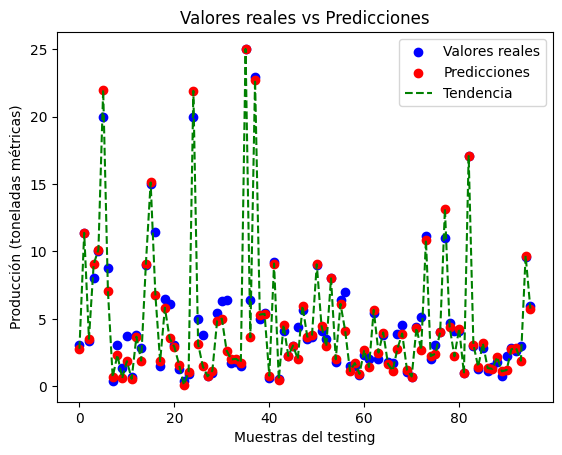

96


In [9]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.scatter(range(len(y_test)), y_test, c='blue', label='Valores reales')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicciones')
plt.plot(range(len(y_test)), y_pred, '--', color='green', label='Tendencia')
plt.xlabel('Muestras del testing')
plt.ylabel('Producción (toneladas métricas)')
plt.title('Valores reales vs Predicciones')
plt.legend()
plt.show()
print(len(y_pred))